In [121]:
## 0.0 IMPORTS
import math
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
## 0.1 Loading data

df_store_raw  = pd.read_csv('data/store.csv', low_memory=False)
df_sales_raw  = pd.read_csv('data/train.csv', low_memory=False)

## merge

df_raw = pd.merge(df_sales_raw,df_store_raw, how='left',on='Store')

In [34]:
## 1.0 Descrição dos dados

df1 = df_raw.copy()

In [35]:
## 1.1 Rename columns

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x : inflection.underscore(x)

new_cols = list(map(snakecase,cols_old))

df1.columns = new_cols

df1.columns


Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In [36]:
## 1.2 Data Dimensions

print('Number of rows : {}'.format(df1.shape[0]))
print('Number of cols : {}'.format(df1.shape[1]))

Number of rows : 1017209
Number of cols : 18


In [37]:
## Data Types

df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [38]:
## 1.4 Check NA

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [29]:
df1['competition_distance'].max()

75860.0

In [77]:
## 1.5 Fillout NA

#competition_distance  

df1['competition_distance'] = np.where(df1['competition_distance'].isna(),200000.0,df1['competition_distance'])

#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year  

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
#promo2                       
#promo2_since_week

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)


#promo2_since_year    
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval               

month_map = {1: 'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}


df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1.apply(lambda x: 1 if (x['promo_interval'] != 0) and (x['month_map'] in x['promo_interval'].split(',')) else 0, axis=1)

In [117]:
## 1.6 Change Types

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)


In [108]:
## 1.7 Descriptive Statistical

num_attributes = df1.select_dtypes(include = ['int32','int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32','int64','float64','datetime64[ns]'])


In [101]:
## 1.7.1 Numerical Attributes

#Central Tendency - mean ,  median

ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T


#Dispersion - std,min,max,range,skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply(np.std)).T
d2 = pd.DataFrame( num_attributes.apply(min)).T
d3 = pd.DataFrame( num_attributes.apply(max)).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() -x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = (['attributes','min','max','range','media','median','std','skew','kurtosis'])

In [102]:
m

,attributes,min,max,range,media,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [109]:
## 1.7.1 Categorical Attributes


cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

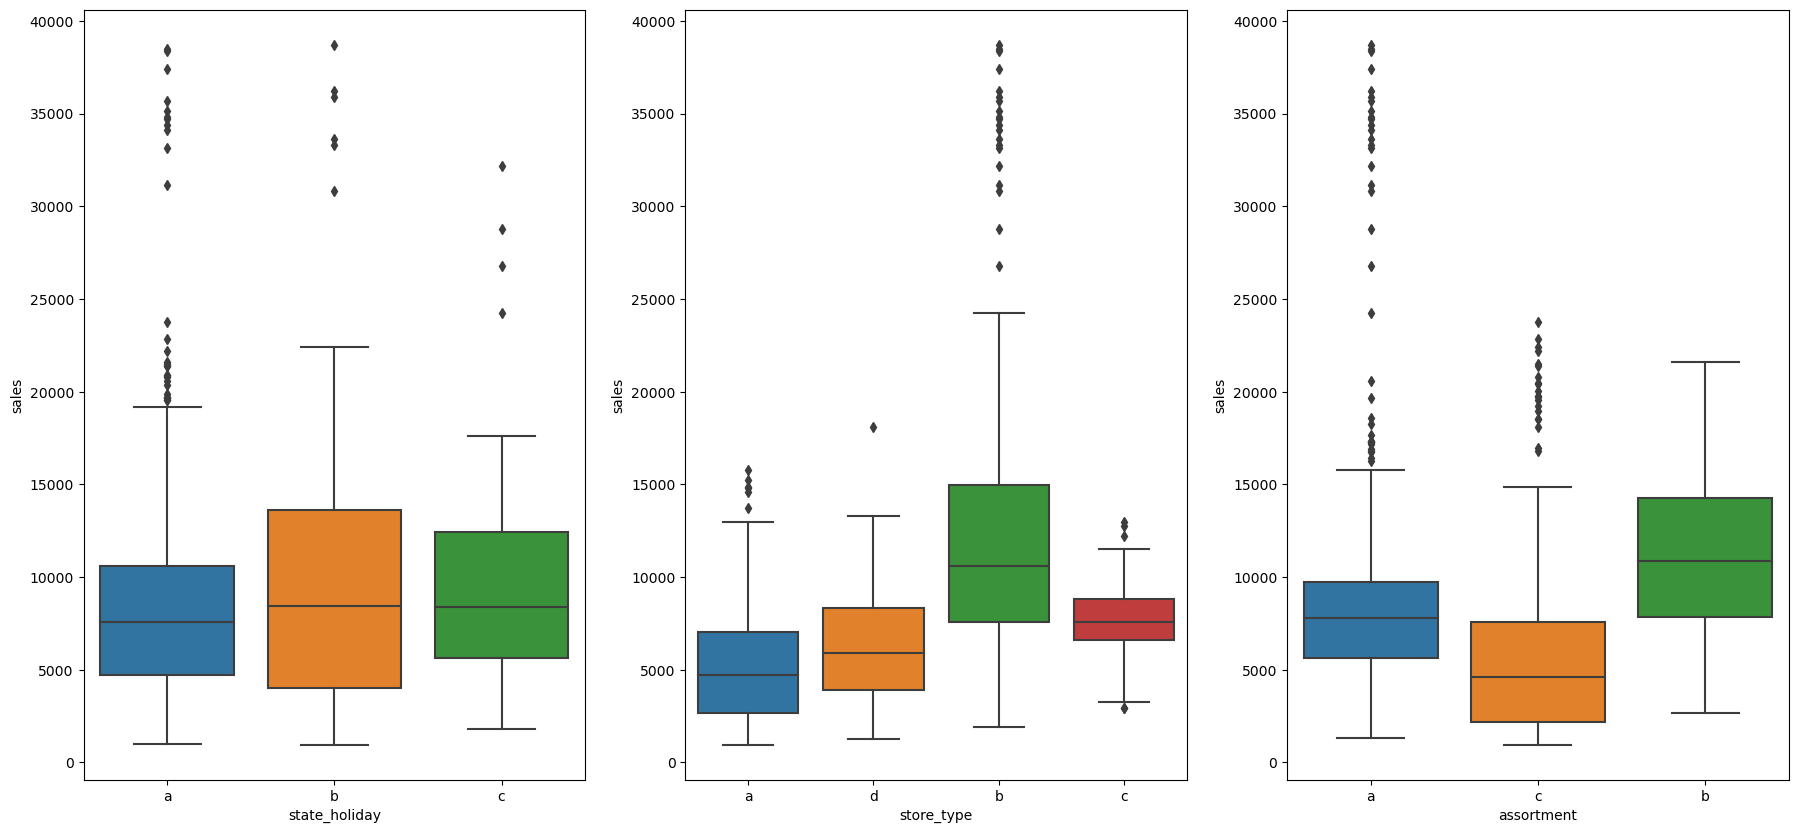

In [127]:
#condições
aux1 = df1[ ((df1['state_holiday']) != '0') & (df1['sales'] > 0)]

plt.figure(figsize=(22, 10))


plt.subplot (1,3,1)
sns.boxplot( x='state_holiday' ,y= 'sales' ,data = aux1 )

plt.subplot (1,3,2)
sns.boxplot( x='store_type' ,y= 'sales' ,data = aux1 )

plt.subplot (1,3,3)
sns.boxplot( x='assortment' ,y= 'sales' ,data = aux1 )